In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def numerical_stability(data):
    return data - data.max()

def prepare_data(data, stability=False):
    if isinstance(data, list):
        data = np.array(data)

    if len(data.shape) == 1:
        # n_samples = data.shape[0] - 1
        data = data.reshape((1, -1))
        X, y = data[:, :-1], data[:, -1:]
        X_prepare = np.hstack((np.ones((1, 1)), X))
    else:
        n_samples = data.shape[0]
        X, y = data[:, :-1], data[:, -1]
        X_prepare = np.hstack((np.ones((n_samples, 1)), X))

    if stability:
        X_prepare = numerical_stability(X_prepare)

    return X_prepare, y

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def predict(X, w):
    return sigmoid(w @ X.T)

def compute_loss(y_hat, y, epsilon=1e-9): # BCE - Binary Cross Entropy
    return -y*np.log(y_hat + epsilon) - (1 - y)*np.log(1 - y_hat + epsilon)

def compute_gradient(X, y, y_hat):
    return X.T @ (y_hat - y)

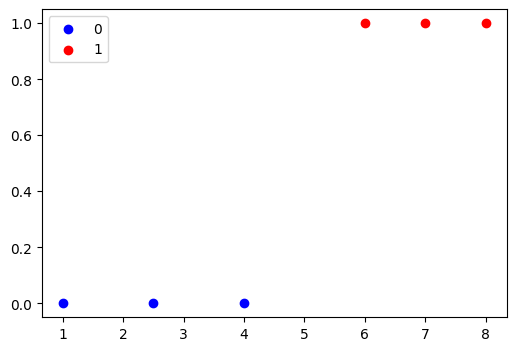

In [3]:
data = np.array([[1.0, 0], 
                 [2.5, 0], 
                 [4.0, 0], 
                 [6.0, 1], 
                 [7.0, 1], 
                 [8.0, 1]])

X, y = data[:, :-1], data[:, -1:]

plt.figure(figsize=(6, 4))
plt.scatter(X[y == 0], y[y == 0], c='b', label='0')
plt.scatter(X[y == 1], y[y == 1], c='r', label='1')
plt.legend()

In [4]:
def fit_model(data, lr=0.001, epoch=100):
    X, y = prepare_data(data)
    print(f"X: {X} \ny: {y}")

    n_features = X.shape[-1]
    # print(f"n_features: {n_features}")

    n_samples = X.shape[0]
    # print(f"n_samples: {n_samples}")

    # w = np.zeros(n_features)
    w = np.random.rand(n_features)
    print(f"w: {w}")

    history = {"losses": [], "params": []}

    for _ in range(epoch):
        yhat = predict(X, w)
        # print(f"y_hat: {yhat}")

        loss = np.mean(compute_loss(yhat, y), axis=0)
        # print(f"loss: {loss}")
        history['losses'].append(loss)

        gradient = compute_gradient(X, y, yhat) / n_samples
        # print(f"gradient: {gradient}")

        history['params'].append(w.copy())
        
        w -= lr * gradient
        # print(f"update: {w}\n")
        
    print(f"New parameter: {w}")

    return history

In [5]:
his = fit_model(data, lr=0.2, epoch=10000)

X: [[1.  1. ]
 [1.  2.5]
 [1.  4. ]
 [1.  6. ]
 [1.  7. ]
 [1.  8. ]] 
y: [0. 0. 0. 1. 1. 1.]
w: [0.99834743 0.5595959 ]
New parameter: [-16.63794406   3.37175841]


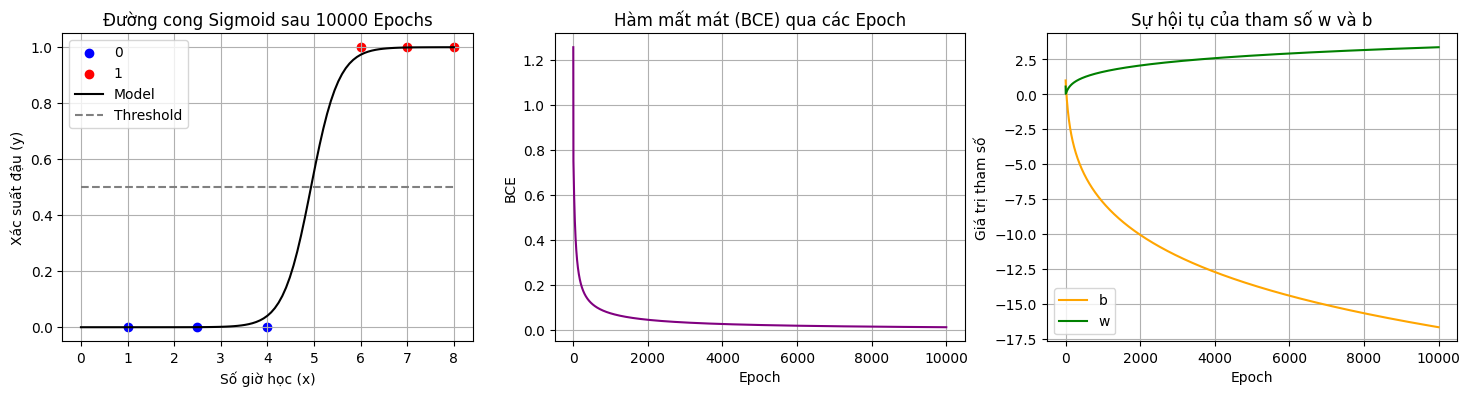

In [6]:
w_new = his['params'][-1]
X_test = np.linspace(0, 8, 101).reshape(-1, 1)
yh = predict(np.hstack((np.ones((101, 1)), X_test)), w_new)

fig, axes = plt.subplots(1, 3, figsize=(18, 4))

axes[0].scatter(X[y == 0], y[y == 0], c='b', label='0')
axes[0].scatter(X[y == 1], y[y == 1], c='r', label='1')
axes[0].plot(X_test, yh, c='black', label='Model')
axes[0].plot(X_test, np.ones(101)*0.5, ls='--', c='gray', label='Threshold')
axes[0].set_title('Đường cong Sigmoid sau 10000 Epochs')
axes[0].set_xlabel('Số giờ học (x)')
axes[0].set_ylabel('Xác suất đậu (y)')
axes[0].grid(True)
axes[0].legend()

axes[1].plot(his['losses'], c='purple', label='loss')
axes[1].set_title('Hàm mất mát (BCE) qua các Epoch')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('BCE')
axes[1].grid(True)

axes[2].plot(np.vstack(his['params'])[:, 0], color='orange', label='b')
axes[2].plot(np.vstack(his['params'])[:, 1], color='green', label='w')
axes[2].set_title('Sự hội tụ của tham số w và b')
axes[2].set_xlabel('Epoch')
axes[2].set_ylabel('Giá trị tham số')
axes[2].grid(True)
axes[2].legend()

plt.show()